In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
import random

In [2]:
# Importing the dataset

#df_fake = pd.read_csv('Fake2.csv')
#df_true = pd.read_csv('True2.csv')

df_true = pd.read_excel('truefinal.xlsx')
df_fake = pd.read_excel('falsefinal.xlsx')


# EXPLORATORY DATA ANALYSIS



In [3]:
# Looking at the number of columns and rows for fake articles

df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1582 non-null   object
 1   text     1582 non-null   object
 2   subject  1582 non-null   object
dtypes: object(3)
memory usage: 37.2+ KB


In [4]:
# Looking at the number of columns and rows for true articles

df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1433 non-null   object
 1   text     1433 non-null   object
 2   subject  1433 non-null   object
dtypes: object(3)
memory usage: 33.7+ KB


In [5]:
# Looking at how the fake dataset looks like by picking the first 5 rows.

df_fake.head()

title  \
0  President William Samoei Arab Ruto has removed...   
1  Deputy president Ringathi Gachangua has said K...   
2  After the petition against the win of presiden...   
3  Laikipia county govenor has ordered all britis...   
4  Nairobi govenor said all the houses in Nairobi...   

                                                text   subject  
0  All the tax on fuel has been removed and it wi...  Politics  
1  East Africa counties are exploiting Kenya and ...  Politics  
2  Supreme court of Kenya has decleared Raila Amo...  Politics  
3  All british nationals should be deported back ...  Politics  
4  All houses in Nairbi and Kiambu should be pain...  Politics

In [6]:
# Looking at how the true articles look like by picking the first 5 rows.

df_true.head()

title  \
0  Drama in Parliament as Azimio MPs claim securi...   
1  Mudavadi to Uhuru and Raila: ‘Don’t provoke th...   
2  There is no quick fix, give us two years': Mud...   
3  Bipartisan talks collapse as Azimio, Kenya Kwa...   
4  Speaker Wetangula offers to ‘midwife’ bipartis...   

                                                text         subject  
0  Nyando MP Jared Okello claimed that the securi...  political news  
1  Mudavadi spoke in the National Assembly hours ...  political news  
2  Prime CS Musalia Mudavadi told members of the ...  political news  
3  The committee's co-chair Otiende Amollo said t...  political news  
4  Wetangula hailed President William Ruto and Az...  political news

In [7]:
# Looking at the number of rows and columns for fake news dataset

df_fake.shape

(1582, 3)

In [8]:
# Looking at the number of rows and columns for true news dataset.

df_true.shape

(1433, 3)

In [9]:
# Labelling 

df_fake['label'] = 1
df_true['label'] = 0

In [10]:
# Combining both datasets

df = pd.concat([df_fake, df_true], axis=0)
df.head()

title  \
0  President William Samoei Arab Ruto has removed...   
1  Deputy president Ringathi Gachangua has said K...   
2  After the petition against the win of presiden...   
3  Laikipia county govenor has ordered all britis...   
4  Nairobi govenor said all the houses in Nairobi...   

                                                text   subject  label  
0  All the tax on fuel has been removed and it wi...  Politics      1  
1  East Africa counties are exploiting Kenya and ...  Politics      1  
2  Supreme court of Kenya has decleared Raila Amo...  Politics      1  
3  All british nationals should be deported back ...  Politics      1  
4  All houses in Nairbi and Kiambu should be pain...  Politics      1

1: Fake
0: True
Distribution of labels:
1    1582
0    1433
Name: label, dtype: int64


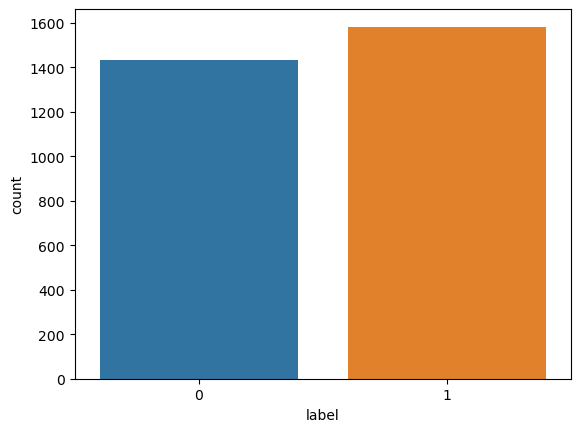

In [11]:
sns.countplot(x="label", data=df);

print("1: Fake")
print("0: True")
print("Distribution of labels:")
print(df.label.value_counts())

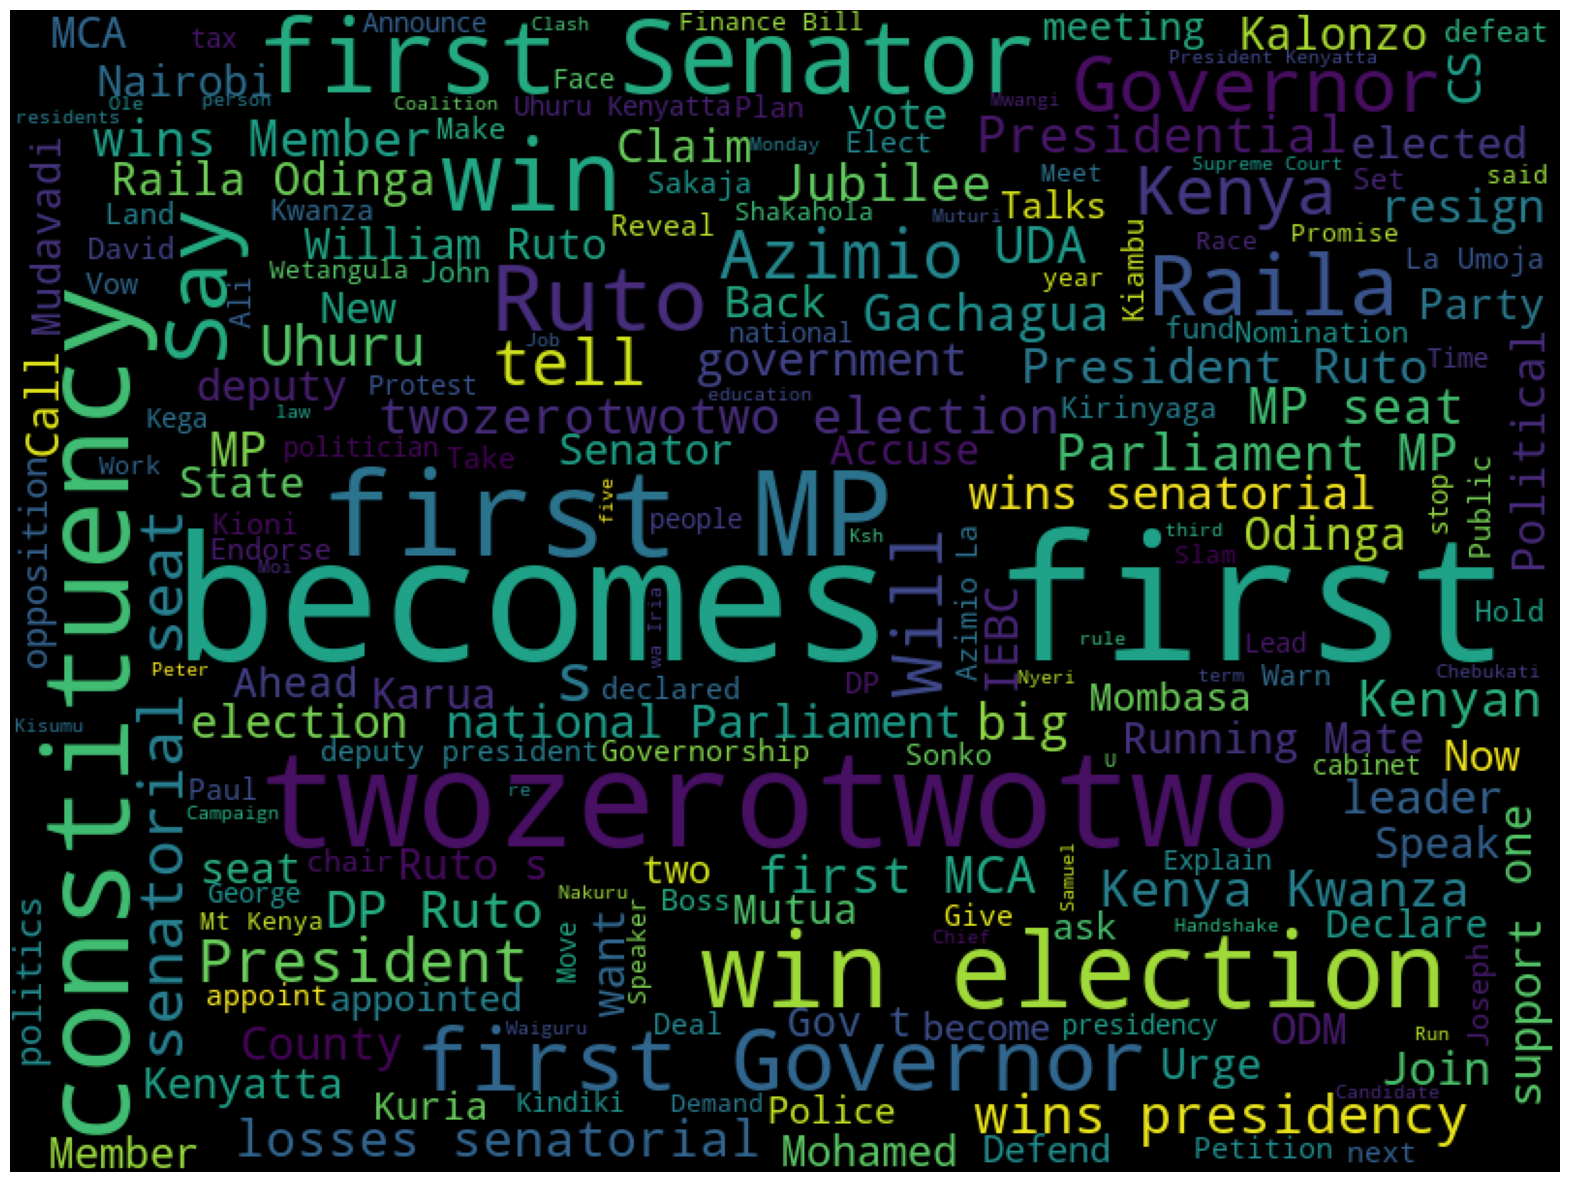

In [12]:
#wordcloud for the two datasets

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='black' , width=800, height=600)
#text_cloud = wordcloud.generate(''.join(df['text']))
text_cloud = wordcloud.generate(''.join(df['title']))
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

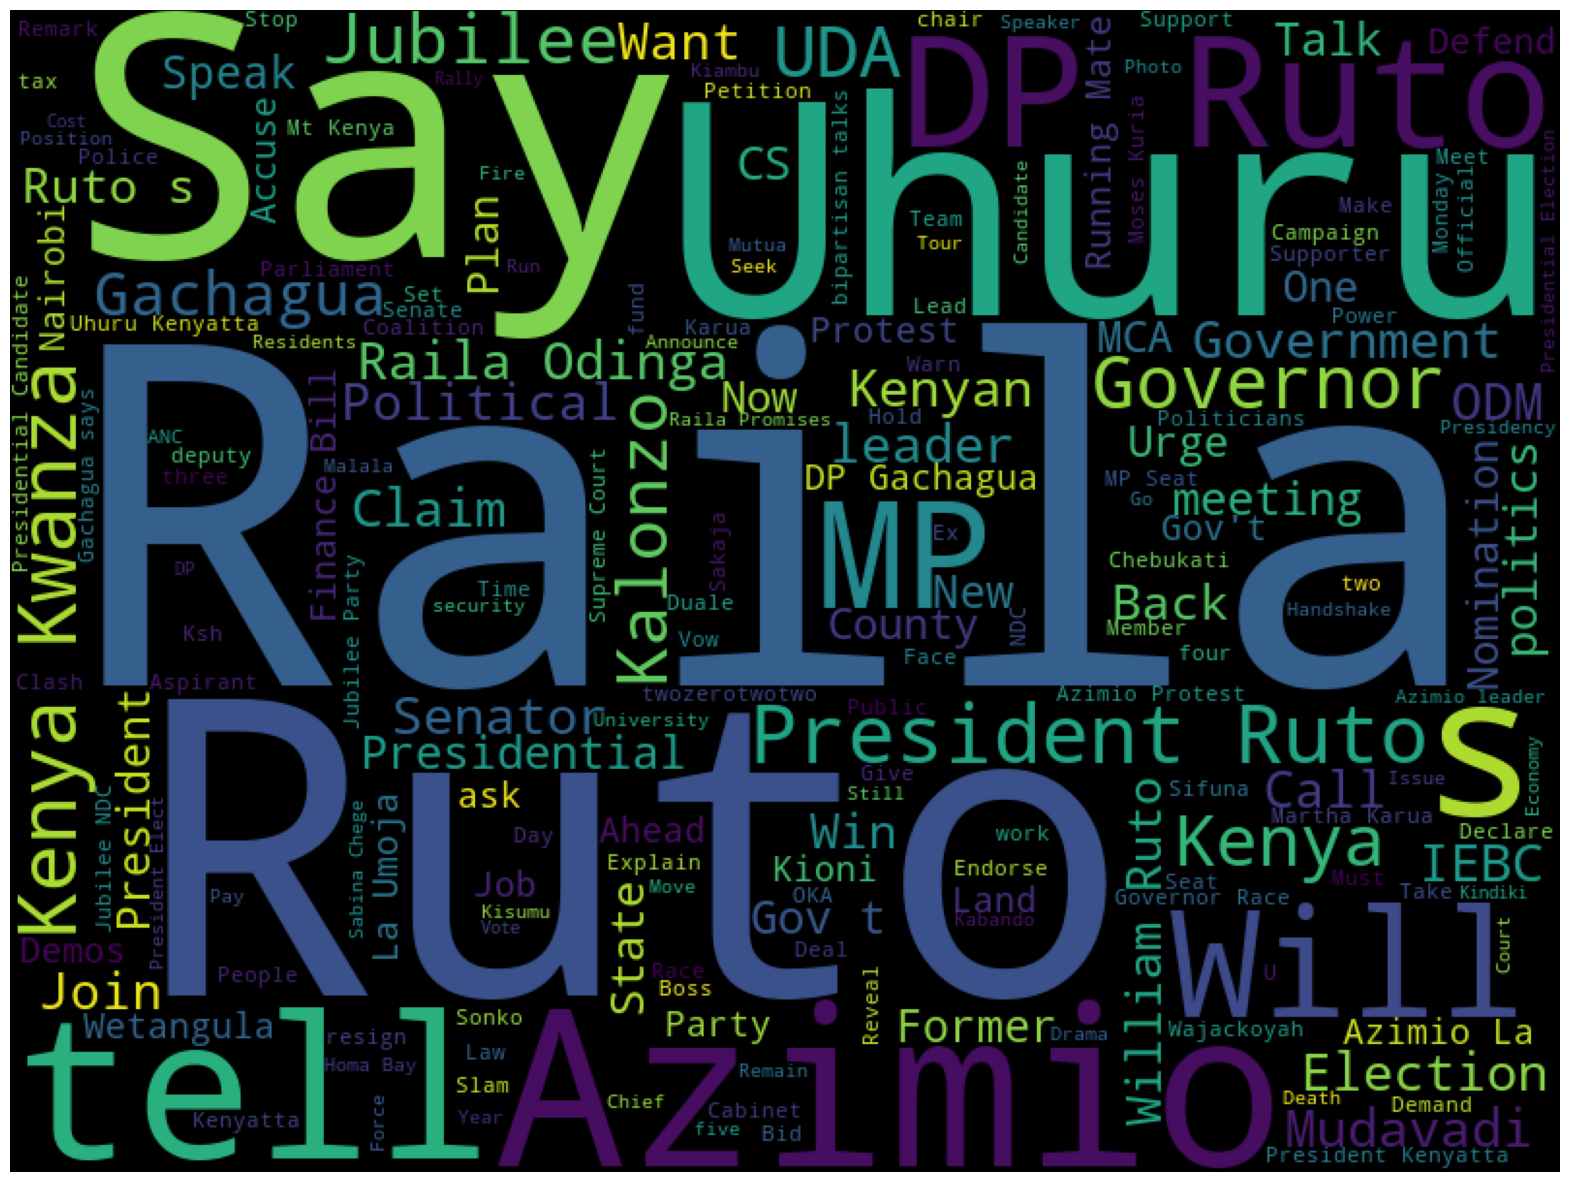

In [13]:
#wordcloud for true news

#true_n = ' '.join(df[df['label']==0]['text']) 
true_n = ' '.join(df[df['label']==0]['title']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

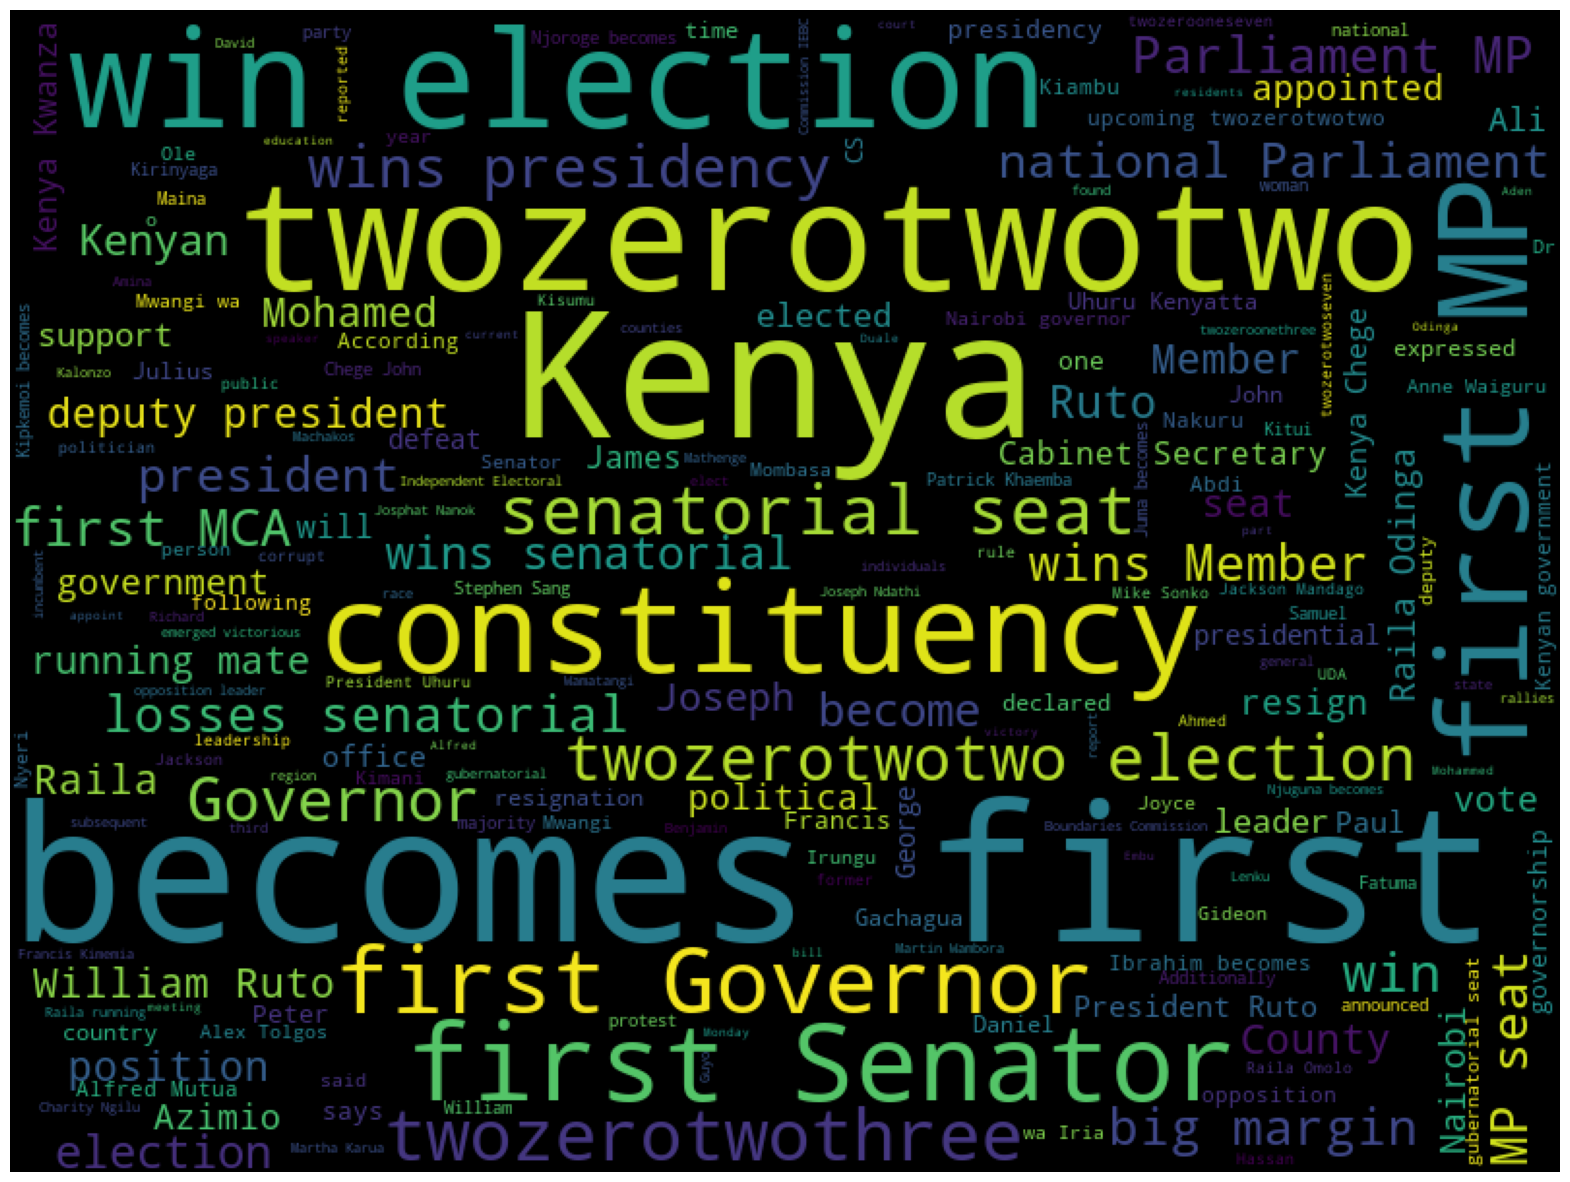

In [14]:
#wordcloud for fake news.

#fake_n = ' '.join(df[df['label']==1]['text'])
fake_n = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
# Looking at the total number of labelled data for both datasets (The dataset is balanced) It's not imbalanced 
# We don't need to balance it.

df['label'].value_counts()

1    1582
0    1433
Name: label, dtype: int64

In [16]:
# Looking for any missing values on the combined dataset.

df.isnull().sum()

title      0
text       0
subject    0
label      0
dtype: int64

In [17]:
# Reshuffle the dataset and maintain uniformity all through.

#random.seed(42)
#df = df.sample(frac=1)
#df.head()




# Set random seed for numpy
np.random.seed(42)

# Shuffle the dataframe
df = df.sample(frac=1, random_state=42)
df.head()

title  \
63    Abdulkadir Haji wins Member of national Parlia...   
1101   Peter Kenneth says he is ready to deputise Raila   
102   Ahmed Shakeel Ahmed Shabbir becomes first Sena...   
1109  CS Eliud Owalo explains Why digital identity i...   
416   CS Alice Wahome Encourages Protest and Demonst...   

                                                   text         subject  label  
63    Abdulkadir Haji wins Member of national Parlia...        Politics      1  
1101  Peter Kenneth expresses readiness to deputize ...  political news      0  
102   Ahmed Shakeel Ahmed Shabbir becomes first Sena...        Politics      1  
1109  Digital ID can promote increased and more incl...  political news      0  
416   CS Alice Wahome advocates for protests and dem...        Politics      1

# FEATURE SELECTION

In [18]:
#df.nunique()

In [19]:
#from sklearn.preprocessing import OrdinalEncoder

In [20]:
#enc = OrdinalEncoder()

In [21]:
#df.columns

In [22]:
#enc.fit(df[['title', 'text', 'subject', 'date', 'label']])

In [23]:
#df[['title', 'text', 'subject', 'date', 'label']] = enc.transform(df[['title', 'text', 'subject', 'date', 'label']])

In [24]:
#df.head()

In [25]:
#df.nunique()

In [26]:
#x = df.iloc[:, 0:4]
#y = df.iloc[:, -1]

In [27]:
#x.head ()

In [28]:
#chi_scores = chi2(x,y)

In [29]:
#chi_scores

In [30]:
#most important feature(title because it has the highest chi value)



#chi_values = pd.Series(chi_scores[0], index=x.columns)
#chi_values.sort_values(ascending=False, inplace=True)
#chi_values.plot.bar()

In [31]:
#df[['title', 'text', 'subject', 'date', 'label']] = enc.inverse_transform(df[['title', 'text', 'subject', 'date', 'label']])

In [32]:
df.head ()

title  \
63    Abdulkadir Haji wins Member of national Parlia...   
1101   Peter Kenneth says he is ready to deputise Raila   
102   Ahmed Shakeel Ahmed Shabbir becomes first Sena...   
1109  CS Eliud Owalo explains Why digital identity i...   
416   CS Alice Wahome Encourages Protest and Demonst...   

                                                   text         subject  label  
63    Abdulkadir Haji wins Member of national Parlia...        Politics      1  
1101  Peter Kenneth expresses readiness to deputize ...  political news      0  
102   Ahmed Shakeel Ahmed Shabbir becomes first Sena...        Politics      1  
1109  Digital ID can promote increased and more incl...  political news      0  
416   CS Alice Wahome advocates for protests and dem...        Politics      1

In [33]:
# I WILL SELECT THE TITLE FEATURE TO USE IT ...... Feature selection



df['all_text'] = df['title']

# DATA CLEANING 

In [34]:
# Tokenization

def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.
    
    Args:
        column: Pandas dataframe column (i.e. df['text']).
    
    Returns:
        tokens (list): Tokenized list , i.e. [President, Ruto, calls, for, unity]
    
    """
    
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 

In [35]:
df['tokenized'] = df.apply(lambda x: tokenize(x['all_text']), axis=1)
df[['title', 'tokenized']].head()

title  \
63    Abdulkadir Haji wins Member of national Parlia...   
1101   Peter Kenneth says he is ready to deputise Raila   
102   Ahmed Shakeel Ahmed Shabbir becomes first Sena...   
1109  CS Eliud Owalo explains Why digital identity i...   
416   CS Alice Wahome Encourages Protest and Demonst...   

                                              tokenized  
63    [Abdulkadir, Haji, wins, Member, of, national,...  
1101  [Peter, Kenneth, says, he, is, ready, to, depu...  
102   [Ahmed, Shakeel, Ahmed, Shabbir, becomes, firs...  
1109  [CS, Eliud, Owalo, explains, Why, digital, ide...  
416   [CS, Alice, Wahome, Encourages, Protest, and, ...

In [36]:
# Punctuations to text representation

def punctuation_to_features(df, column):
    """Identify punctuation within a column and convert to a text representation.
    
    Args:
        df (object): Pandas dataframe.
        column (string): Name of column containing text. 
        
    Returns:
        df[column]: Original column with punctuation converted to text, 
                    i.e. "Wow! > "Wow exclamation"
    
    """
    
    df[column] = df[column].replace('!', ' exclamation ')
    df[column] = df[column].replace('?', ' question ')
    df[column] = df[column].replace('\'', ' quotation ')
    df[column] = df[column].replace('\"', ' quotation ')
    
    return df[column]
df['all_text'] = punctuation_to_features(df, 'all_text')

In [37]:
# Removing stopwords

def remove_stopwords(tokenized_column):
    """Return a list of tokens with English stopwords removed. 
    
    Args:
        column: Pandas dataframe column of tokenized data from tokenize()
    
    Returns:
        tokens (list): Tokenized list with stopwords removed.
    
    """
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]


In [38]:
df['stopwords_removed'] = df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
df[['title', 'stopwords_removed']].head()

title  \
63    Abdulkadir Haji wins Member of national Parlia...   
1101   Peter Kenneth says he is ready to deputise Raila   
102   Ahmed Shakeel Ahmed Shabbir becomes first Sena...   
1109  CS Eliud Owalo explains Why digital identity i...   
416   CS Alice Wahome Encourages Protest and Demonst...   

                                      stopwords_removed  
63    [Abdulkadir, Haji, wins, Member, national, Par...  
1101     [Peter, Kenneth, says, ready, deputise, Raila]  
102   [Ahmed, Shakeel, Ahmed, Shabbir, becomes, firs...  
1109  [CS, Eliud, Owalo, explains, Why, digital, ide...  
416   [CS, Alice, Wahome, Encourages, Protest, Demon...

In [39]:
# stemming 

def apply_stemming(tokenized_column):
    """Return a list of tokens with Porter stemming applied.
    
    Args:
        column: Pandas dataframe column of tokenized data with stopwords removed.
    
    Returns:
        tokens (list): Tokenized list with words Porter stemmed.
    
    """
    
    stemmer = PorterStemmer() 
    return [stemmer.stem(word).lower() for word in tokenized_column]

In [40]:
df['porter_stemmed'] = df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
df[['title', 'porter_stemmed']].head()

title  \
63    Abdulkadir Haji wins Member of national Parlia...   
1101   Peter Kenneth says he is ready to deputise Raila   
102   Ahmed Shakeel Ahmed Shabbir becomes first Sena...   
1109  CS Eliud Owalo explains Why digital identity i...   
416   CS Alice Wahome Encourages Protest and Demonst...   

                                         porter_stemmed  
63    [abdulkadir, haji, win, member, nation, parlia...  
1101       [peter, kenneth, say, readi, deputis, raila]  
102   [ahm, shakeel, ahm, shabbir, becom, first, sen...  
1109  [cs, eliud, owalo, explain, whi, digit, ident,...  
416   [cs, alic, wahom, encourag, protest, demonstr,...

In [41]:
# Rejoining the words

def rejoin_words(tokenized_column):
    return ( " ".join(tokenized_column))

In [42]:
df['all_text'] = df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
df[['title', 'all_text']].head()

title  \
63    Abdulkadir Haji wins Member of national Parlia...   
1101   Peter Kenneth says he is ready to deputise Raila   
102   Ahmed Shakeel Ahmed Shabbir becomes first Sena...   
1109  CS Eliud Owalo explains Why digital identity i...   
416   CS Alice Wahome Encourages Protest and Demonst...   

                                               all_text  
63    abdulkadir haji win member nation parliament m...  
1101              peter kenneth say readi deputis raila  
102   ahm shakeel ahm shabbir becom first senat twoz...  
1109  cs eliud owalo explain whi digit ident imper k...  
416   cs alic wahom encourag protest demonstr fight ...

# TRAIN TEST VALIDATION SPLIT

In [43]:

# dependent and independent variables

x = df['all_text']
y = df['label']


In [44]:
# 80% for training ,10% validation and 10% for teting

x_main, x_test, y_main,y_test= train_test_split(x,y,test_size=0.10)
x_train, x_val, y_train, y_val = train_test_split(x_main,y_main,test_size=0.10)


In [45]:
# importing tfidf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
# Vectorization

vectorization = TfidfVectorizer()
xv_train  = vectorization.fit_transform(x_train)



import pickle
with open("vectorization.pkl", "wb") as file:
    pickle.dump(vectorization, file)
    
    

xv_test = vectorization.transform(x_test)
xv_val = vectorization.transform(x_val)

# TRAINING

# LOGISTIC REGRESSION

In [47]:

from sklearn.linear_model import LogisticRegression

In [48]:
LR = LogisticRegression()
LR.fit(xv_train,  y_train)

LogisticRegression()

In [49]:
#Validating the model
LR.score(xv_val,y_val)

0.9301470588235294

In [50]:
LR.score(xv_test,y_test)

0.9503311258278145

In [51]:
# passing the test data on the model

pred_LR = LR.predict(xv_test)
print(pred_LR)

[1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 0]


In [52]:
y_pred_LR = LR.decision_function(xv_test)
print(y_pred_LR)

[ 0.04443997 -2.09872624 -1.28587033  3.35363018 -1.74667267  8.33272019
 -3.20719564  2.16791717 -3.34072714 -1.5837394  -1.99845059  4.48616389
  0.94148919  2.01025955 -2.19768639  6.03684517 -1.92960265 -2.11149543
  8.33272019  6.18590601 -2.91128775 -2.22999902 -1.99131214 -1.94366604
 -1.3230257  -2.90365926 -0.92791796  1.92773556 -3.43679749 -0.73285476
 -2.09565006 -2.42045876 -1.48402873  2.0544396  -2.41147352 -0.37529675
 -3.13827332  5.28069257 -0.81590001  0.21770457  0.92092626  2.80357543
 -3.09025448  4.22557316 -2.49684849  2.6272146  -0.51792628 -3.03449793
  3.74264757 -0.76911601 -0.91276188 -1.68576433  1.64424435 -2.19365386
 -1.87935341 -1.9112676   3.97042906  0.65562046 -0.98510687  4.41366008
 -1.61786409 -1.61291723 -0.79791312 -2.24277484  2.92198781  1.02207743
 -0.63813316  4.58871429  2.64182895  4.22044505  5.49144496 -0.34978713
 -1.25217084 -0.58795239  2.43588153 -2.90105427 -0.78635115 -2.54362224
 -0.85671599  2.85207188 -1.84616081 -2.66120755  2

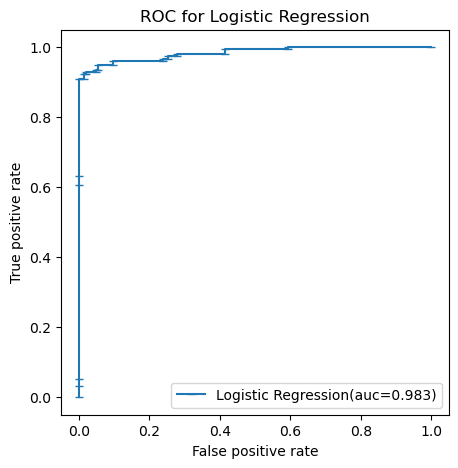

In [53]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_LR)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='_', label ='Logistic Regression(auc=%0.3f)'% auc_logistic)
plt.title('ROC for Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend()
plt.show()

In [54]:
cm = confusion_matrix(y_test,pred_LR)
print (cm)

[[147   0]
 [ 15 140]]


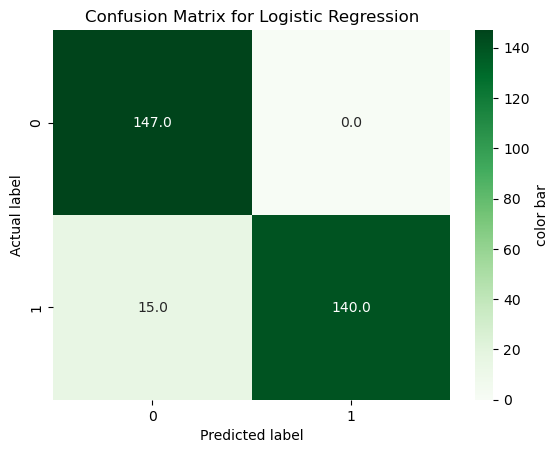

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Greens", annot=True, fmt=".1f", cbar_kws={"orientation":"vertical","label":"color bar"},)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [56]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,pred_LR)
print(f"Sensitivity: {recall}")

Sensitivity: 0.9032258064516129


In [57]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,pred_LR)
print(f"precision: {precision}")

precision: 1.0


In [58]:
specificity=cm [0,0]/(cm[0,0]+cm[0,1])
print(f"specificity: {specificity}")

specificity: 1.0


In [59]:
# classification report (evaluation)

print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       147
           1       1.00      0.90      0.95       155

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302



# DECISION TREE

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
DT  = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [62]:
#Validating the model
DT.score(xv_val,y_val)

0.8713235294117647

In [63]:
DT.score(xv_test,y_test)

0.9105960264900662

In [64]:
pred_DT = DT.predict(xv_test)
print(pred_DT)

[1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0
 0 1 0 0 1 0]


In [65]:
y_pred_DT = DT.predict_proba(xv_test)
print(y_pred_DT)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [66]:
#from sklearn.metrics import roc_curve, auc

#DT_fpr, DT_tpr, threshold = roc_curve(y_test, y_pred_DT)
#auc_DT = auc(DT_fpr, DT_tpr)

#plt.figure(figsize=(5,5), dpi=100)
#plt.plot(DT_fpr, DT_tpr, marker='_', label ='DT(auc=%0.3f)'% auc_DT)
#plt.xlabel('False positive rate')
#plt.ylabel('True positive rate')

#plt.legend()
#plt.show()

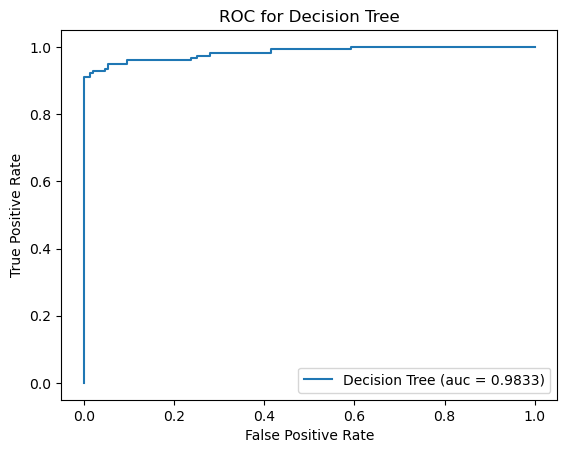

In [67]:
# Calculate the ROC curve
DT_fpr, DT_tpr, threshold = roc_curve(y_test, y_pred_LR)
auc_DT = auc(DT_fpr, DT_tpr)


# Plot the ROC curve
plt.plot(DT_fpr, DT_tpr, label='Decision Tree (auc = %0.4f)' % auc_DT)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree')
plt.legend()
plt.show()




In [68]:
cm = confusion_matrix(y_test,pred_DT)
print (cm)

[[134  13]
 [ 14 141]]


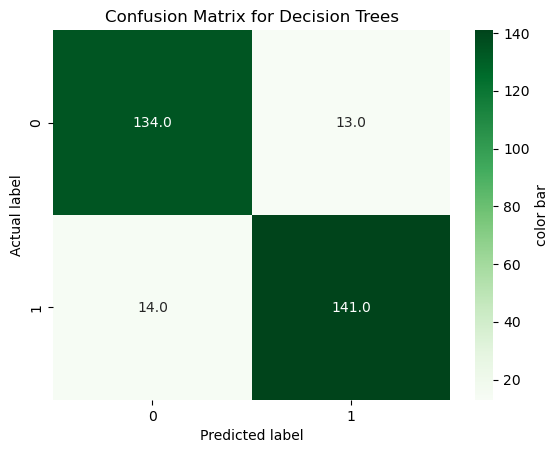

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Greens", annot=True, fmt=".1f", cbar_kws={"orientation":"vertical","label":"color bar"},)
plt.title('Confusion Matrix for Decision Trees')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [70]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,pred_DT)
print(f"sensitivity: {recall}")

sensitivity: 0.9096774193548387


In [71]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,pred_DT)
print(f"precision: {precision}")

precision: 0.9155844155844156


In [72]:
specificity=cm [0,0]/(cm[0,0]+cm[0,1])
print(f"specificity: {specificity}")

specificity: 0.9115646258503401


In [73]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       147
           1       0.92      0.91      0.91       155

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



# RANDOM FOREST

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [76]:
#Validation
RFC.score(xv_val,y_val)

0.9375

In [77]:
#Testing
RFC.score(xv_test,y_test)

0.9238410596026491

In [78]:
pred_RFC = RFC.predict(xv_test)
print(pred_RFC)

[1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 1 0]


In [79]:
y_pred_RFC = RFC.predict_proba(xv_test)[:, 1]
print(y_pred_RFC)

[0.55 0.04 0.08 1.   0.02 1.   0.01 1.   0.09 0.28 0.01 1.   0.85 1.
 0.02 1.   0.02 0.03 1.   1.   0.04 0.01 0.07 0.19 0.   0.02 0.12 1.
 0.03 0.29 0.07 0.02 0.16 1.   0.   0.31 0.01 1.   0.24 0.52 0.76 1.
 0.06 1.   0.02 1.   0.07 0.02 1.   0.18 0.17 0.04 1.   0.02 0.01 0.07
 1.   0.71 0.25 1.   0.26 0.02 0.49 0.01 0.92 0.86 0.46 1.   1.   1.
 1.   0.63 0.32 0.17 1.   0.01 0.35 0.04 0.39 1.   0.01 0.03 1.   0.97
 0.32 1.   1.   1.   0.99 1.   0.01 0.05 0.05 1.   0.1  0.41 1.   0.98
 0.17 1.   0.19 1.   0.73 0.03 0.03 1.   1.   1.   0.06 0.01 0.14 1.
 0.02 0.22 0.39 0.04 1.   0.04 0.02 0.03 0.02 0.09 0.99 1.   0.05 0.12
 1.   0.72 0.01 1.   0.06 1.   1.   0.86 0.3  0.98 0.12 0.98 0.02 0.04
 1.   0.39 1.   0.   1.   1.   0.61 0.02 1.   0.81 1.   0.08 0.18 1.
 0.02 0.16 0.03 0.18 0.1  0.07 0.02 0.09 0.02 1.   0.   0.19 0.35 0.92
 0.28 0.98 0.36 1.   0.33 0.73 0.02 0.02 0.42 0.01 0.1  1.   0.07 1.
 0.03 0.99 0.23 1.   0.14 0.13 1.   0.39 1.   1.   1.   0.59 0.25 0.63
 0.02 0.01 1.   1.  

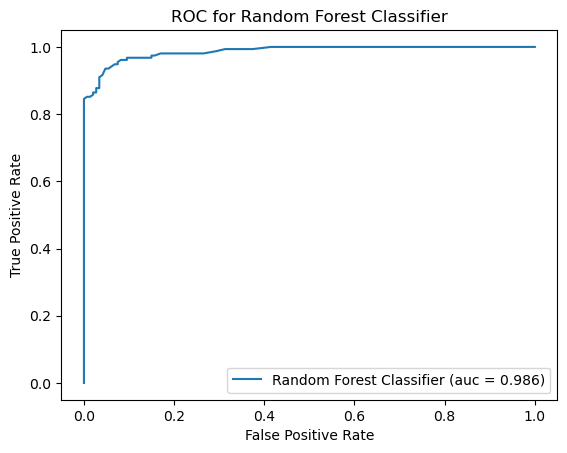

In [80]:
# Calculate the ROC curve
RFC_fpr, RFC_tpr, threshold = roc_curve(y_test, y_pred_RFC)
auc_RFC = auc(RFC_fpr, RFC_tpr)


# Plot the ROC curve
plt.plot(RFC_fpr, RFC_tpr, label='Random Forest Classifier (auc = %0.3f)' % auc_RFC)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest Classifier')
plt.legend()
plt.show()

In [81]:
cm = confusion_matrix(y_test,pred_RFC)
print (cm)

[[143   4]
 [ 19 136]]


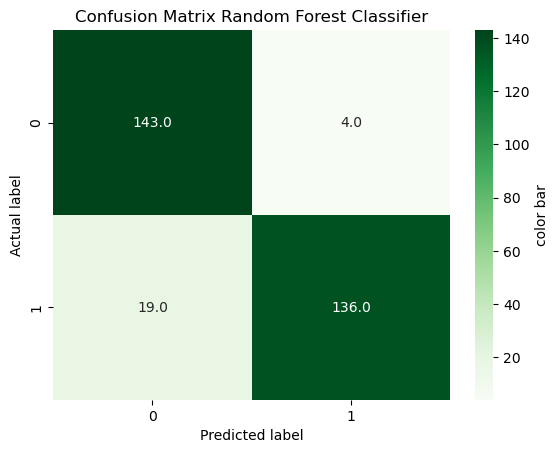

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Greens", annot=True, fmt=".1f", cbar_kws={"orientation":"vertical","label":"color bar"},)
plt.title('Confusion Matrix Random Forest Classifier')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [83]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,pred_RFC)
print(f"sensitivity: {recall}")

sensitivity: 0.8774193548387097


In [84]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,pred_RFC)
print(f"precision: {precision}")

precision: 0.9714285714285714


In [85]:
specificity=cm [0,0]/(cm[0,0]+cm[0,1])
print(f"specificity: {specificity}")

specificity: 0.9727891156462585


In [86]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       147
           1       0.97      0.88      0.92       155

    accuracy                           0.92       302
   macro avg       0.93      0.93      0.92       302
weighted avg       0.93      0.92      0.92       302



# NAIVE BAYES

In [87]:
# Multinomial Naive baye classifier

from sklearn.naive_bayes import MultinomialNB

In [88]:
MNB = MultinomialNB()
MNB.fit(xv_train,y_train)

MultinomialNB()

In [89]:
#Validating the model
MNB.score(xv_val,y_val)

0.9227941176470589

In [90]:
MNB.score(xv_test,y_test)

0.9437086092715232

In [91]:
pred_MNB = MNB.predict(xv_test)
print(pred_MNB)

[1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0
 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0]


In [92]:
y_pred_MNB = MNB.predict_proba(xv_test)[:, 1]
print(y_pred_MNB)

[0.67693016 0.11877511 0.11723406 0.97787459 0.03795803 0.99985482
 0.00569903 0.96772844 0.01351289 0.06143209 0.07166283 0.98475493
 0.56224415 0.96270434 0.04568014 0.99922767 0.0331731  0.05337921
 0.99985482 0.9990314  0.01862477 0.03124418 0.04197201 0.03367403
 0.16547529 0.01326234 0.20931793 0.93224472 0.00637588 0.13794717
 0.05589654 0.01586561 0.20277807 0.97245613 0.03193919 0.25115201
 0.00848194 0.99827069 0.06844216 0.82146172 0.53303407 0.976638
 0.02136597 0.9957551  0.0146209  0.98123352 0.43401144 0.04640132
 0.99190092 0.35261356 0.22982232 0.08959099 0.94872976 0.03444472
 0.09236853 0.08976988 0.99784167 0.48792534 0.35960063 0.99377044
 0.14339885 0.09795925 0.18867082 0.04109905 0.89444475 0.50656386
 0.18759652 0.99489131 0.9706108  0.99884788 0.99848358 0.46555594
 0.18136084 0.27587334 0.95017951 0.0126491  0.21914688 0.09912478
 0.5711755  0.970289   0.20762505 0.0385801  0.95323584 0.95429148
 0.142284   0.94327844 0.99920848 0.99386864 0.9563387  0.983557

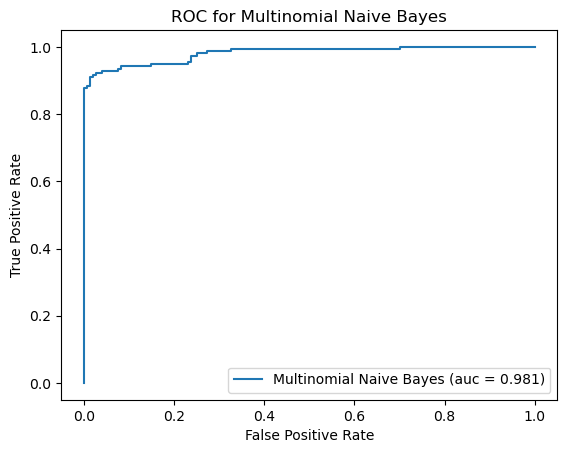

In [93]:
# Calculate the ROC curve
MNB_fpr, MNB_tpr, threshold = roc_curve(y_test, y_pred_MNB)
auc_MNB = auc(MNB_fpr, MNB_tpr)


# Plot the ROC curve
plt.plot(MNB_fpr, MNB_tpr, label='Multinomial Naive Bayes (auc = %0.3f)' % auc_MNB)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multinomial Naive Bayes')
plt.legend()
plt.show()

In [94]:
cm = confusion_matrix(y_test,pred_MNB)
print (cm)

[[144   3]
 [ 14 141]]


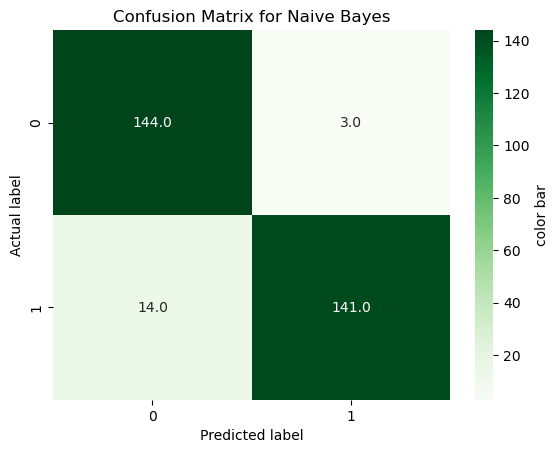

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Greens", annot=True, fmt=".1f", cbar_kws={"orientation":"vertical","label":"color bar"},)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [96]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,pred_MNB)
print(f"sensitivity: {recall}")

sensitivity: 0.9096774193548387


In [97]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,pred_MNB)
print(f"precision: {precision}")

precision: 0.9791666666666666


In [98]:
specificity=cm [0,0]/(cm[0,0]+cm[0,1])
print(f"specificity: {specificity}")

specificity: 0.9795918367346939


In [99]:
print(classification_report(y_test,pred_MNB))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       147
           1       0.98      0.91      0.94       155

    accuracy                           0.94       302
   macro avg       0.95      0.94      0.94       302
weighted avg       0.95      0.94      0.94       302



# SUPPORT VECTOR MACHINE

In [100]:
#SUPPORT VECTOR CLASSIFIER

from sklearn.svm import LinearSVC

In [101]:
SVM = LinearSVC()
SVM.fit(xv_train,y_train)

LinearSVC()

In [102]:
#Validating the model
SVM.score(xv_val,y_val)

0.9558823529411765

In [103]:
SVM.score(xv_test,y_test)

0.9635761589403974

In [104]:
pred_SVM = SVM.predict(xv_test)
print(pred_SVM)

[1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 0]


In [105]:
y_pred_SVM = SVM.decision_function(xv_test)
print(y_pred_SVM)

[ 0.23872706 -0.91879311 -0.33546369  1.51596274 -0.9706303   3.88657687
 -1.62437167  1.04275866 -1.53749923 -1.16395255 -0.60572892  2.17679818
  0.67672445  0.92825711 -1.4122738   2.81522816 -1.01917072 -1.24649526
  3.88657687  2.83147973 -1.48087036 -1.00485086 -0.88280935 -0.8647449
 -0.81498989 -1.36529779 -0.78410811  0.93537644 -1.5434325   0.52274426
 -1.20083416 -1.37628024 -0.8389269   0.91702463 -1.71184528 -0.01331928
 -1.84204817  2.41827985 -0.44574637  1.05695257  0.61662522  1.29427014
 -1.75955367  2.07761906 -1.55165107  0.99063437 -0.33029801 -1.71815851
  1.68613699 -0.61897649 -0.30753006 -0.80717857  0.65067044 -0.99299511
 -1.23241834 -0.68683083  1.8523698   0.70969721 -0.33208683  2.03544188
 -0.52193445 -1.06169311 -0.68974276 -1.29798913  1.30797067  0.72162335
  0.19974236  2.17322735  1.16182416  2.09407452  2.5594022  -0.21418481
 -0.81184318 -0.2994097   1.11196957 -1.87517897 -0.28293196 -1.12081858
  0.03213329  1.49550264 -0.91237761 -1.20331207  1.

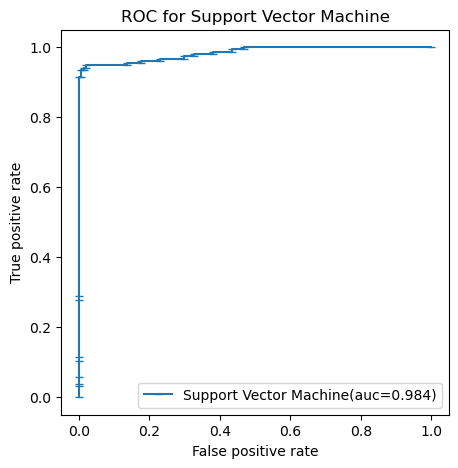

In [106]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_SVM)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, marker='_', label ='Support Vector Machine(auc=%0.3f)'% auc_svm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC for Support Vector Machine')
plt.legend()
plt.show()

In [107]:
#print(confusion_matrix(y_test,pred_SVM))


cm = confusion_matrix(y_test,pred_SVM)
print (cm)


[[146   1]
 [ 10 145]]


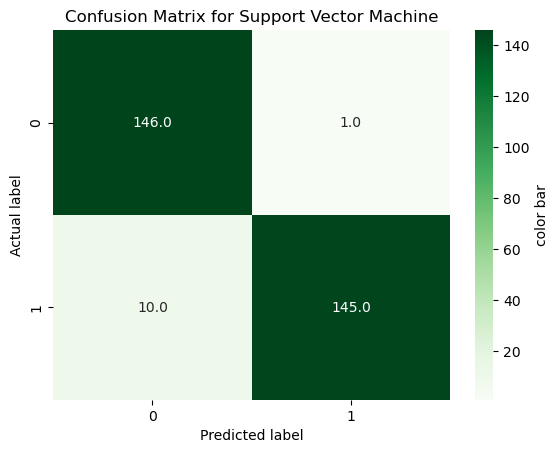

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Greens", annot=True, fmt=".1f", cbar_kws={"orientation":"vertical","label":"color bar"},)
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [109]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,pred_SVM)
print(f"sensitivity: {recall}")

sensitivity: 0.9354838709677419


In [110]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,pred_SVM)
print(f"precision: {precision}")

precision: 0.9931506849315068


In [111]:
specificity=cm [0,0]/(cm[0,0]+cm[0,1])
print(f"specificity: {specificity}")

specificity: 0.9931972789115646


In [112]:
print(classification_report(y_test,pred_SVM))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       147
           1       0.99      0.94      0.96       155

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.97      0.96      0.96       302



# GRADIENT BOOSTING CLASSIFIER

In [113]:

from sklearn.ensemble import GradientBoostingClassifier

In [114]:
GBC = GradientBoostingClassifier()
GBC.fit(xv_train,y_train)

GradientBoostingClassifier()

In [115]:
#Validating the model
GBC.score(xv_val,y_val)

0.9117647058823529

In [116]:
GBC.score(xv_test,y_test)

0.9304635761589404

In [117]:
pred_GBC = GBC.predict(xv_test)
print(pred_GBC)

[1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 0 0 0 1 0]


In [118]:
y_pred_GBC = GBC.decision_function(xv_test)
print(y_pred_GBC)

[ 0.27163052 -2.83933649 -0.44348144  3.85612248 -1.90787374  4.1213138
 -2.3399525   2.82801046 -1.68364401 -0.76150732 -2.79517311  3.85612248
  2.25769654  3.6392583  -1.89081886  4.19928944 -2.24172328 -1.65091621
  4.1213138   4.19928944 -2.83933649 -1.73865015 -1.84888387 -1.53274625
 -2.62618193 -2.29837431 -1.53450769  2.83444921 -3.43355068 -0.79309755
 -1.59450696 -1.79313776 -1.39711546  3.6392583  -2.25227303 -1.39856575
 -3.07942511  4.19928944 -0.40907822  1.13978222  2.95669221  3.6392583
 -2.86950763  4.19928944 -1.77864022  3.6392583  -1.60455584 -2.48939431
  4.11081362 -1.53450769 -1.53450769 -1.94166662  1.99560346 -1.96641099
 -1.77864022 -2.67015689  4.1213138   2.6162098  -1.53450769  4.1213138
 -1.57908787 -1.53450769 -0.90948099 -1.77864022  2.53817118  2.99965867
  0.53765332  4.19928944  3.85612248  4.1213138   4.19928944 -0.53540244
 -1.53450769 -1.60907765  3.85612248 -1.90603117 -0.23024326 -2.87178701
 -1.46569109  3.50292403 -2.03411642 -2.74802438  3.85

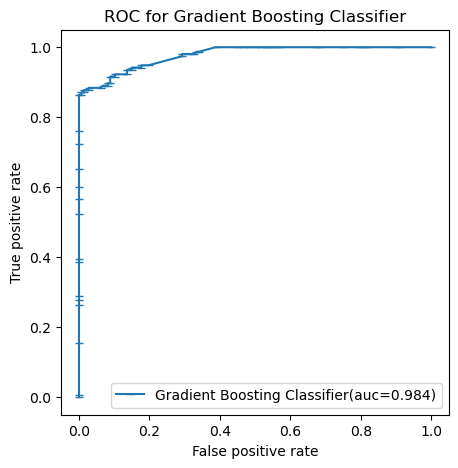

In [119]:
from sklearn.metrics import roc_curve, auc

gbc_fpr, gbc_tpr, threshold = roc_curve(y_test, y_pred_GBC)
auc_gbc = auc(gbc_fpr, gbc_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(gbc_fpr, gbc_tpr, marker='_', label ='Gradient Boosting Classifier(auc=%0.3f)'% auc_svm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC for Gradient Boosting Classifier')
plt.legend()
plt.show()

In [120]:
cm = confusion_matrix(y_test,pred_GBC)
print (cm)



[[147   0]
 [ 21 134]]


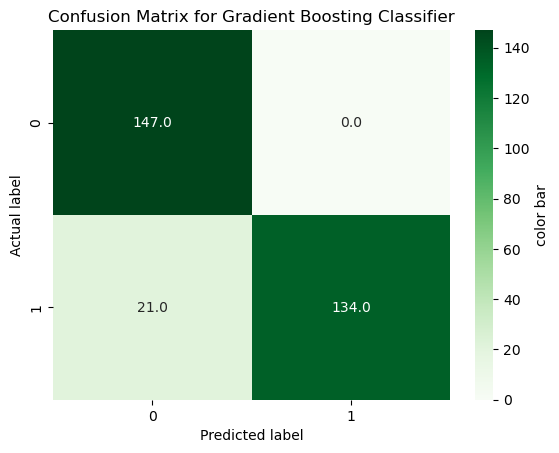

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Greens", annot=True, fmt=".1f", cbar_kws={"orientation":"vertical","label":"color bar"},)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [122]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,pred_GBC)
print(f"sensitivity: {recall}")

sensitivity: 0.864516129032258


In [123]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,pred_GBC)
print(f"precision: {precision}")

precision: 1.0


In [124]:
specificity=cm [0,0]/(cm[0,0]+cm[0,1])
print(f"specificity: {specificity}")

specificity: 1.0


In [125]:
print(classification_report(y_test,pred_GBC))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       147
           1       1.00      0.86      0.93       155

    accuracy                           0.93       302
   macro avg       0.94      0.93      0.93       302
weighted avg       0.94      0.93      0.93       302



# Artificial Neural network

In [126]:
#multilayer perceptron feed forward neural network


from sklearn.neural_network import MLPClassifier

In [127]:
#maxmum retaration 500, 


mlp = MLPClassifier(max_iter=500, activation='relu')
mlp.fit(xv_train,y_train)

MLPClassifier(max_iter=500)

In [128]:
#validation


mlp.score(xv_val,y_val)

0.9264705882352942

In [129]:
mlp.score(xv_test,y_test)

0.9602649006622517

In [130]:
pred_mlp = mlp.predict(xv_test)
print(pred_mlp)

[1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 0 0 0 1 0]


In [131]:
y_pred_mlp = mlp.predict_proba(xv_test)[:, 1]
print(y_pred_mlp)

[8.96474242e-01 1.38353216e-03 1.18025702e-01 9.99673404e-01
 3.33011499e-04 9.99994864e-01 2.29860443e-05 9.99515148e-01
 3.27518736e-04 2.78545374e-04 1.01959394e-01 9.99760927e-01
 7.16885528e-01 9.99279117e-01 1.08268282e-04 9.99973815e-01
 2.99869992e-04 1.37038778e-04 9.99994864e-01 9.99978325e-01
 5.81242793e-05 1.15337617e-03 6.66789037e-04 3.33794284e-03
 9.82927567e-04 2.06337952e-04 1.00263294e-02 9.99145717e-01
 8.31711337e-05 9.70544698e-01 1.16563311e-03 5.13612521e-05
 3.50505808e-02 9.99223002e-01 2.18002218e-05 2.85948691e-01
 1.76284477e-05 9.99973707e-01 1.28387966e-02 9.99559399e-01
 9.87269842e-01 9.99158861e-01 1.82684544e-05 9.99952649e-01
 2.12513252e-05 9.99432749e-01 7.67993637e-02 4.65505966e-04
 9.99783179e-01 1.80886514e-02 1.19683682e-01 3.34613146e-03
 9.62367956e-01 7.72872622e-04 1.23150901e-04 1.82661376e-02
 9.99931029e-01 9.87381213e-01 8.70310164e-01 9.99840042e-01
 1.35621955e-01 2.68098862e-04 6.43745920e-03 1.45391860e-04
 9.99328947e-01 9.808113

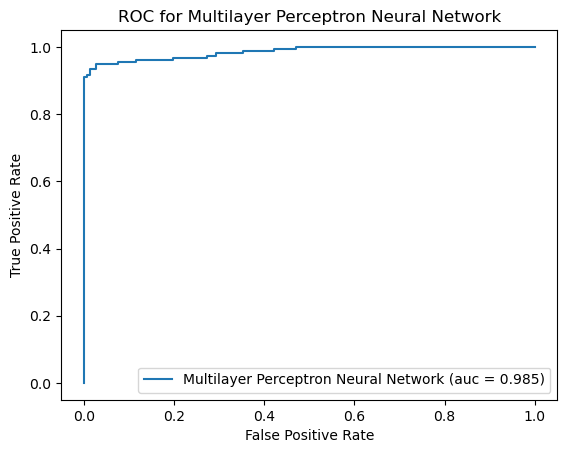

In [132]:
# Calculate the ROC curve
mlp_fpr, mlp_tpr, threshold = roc_curve(y_test, y_pred_mlp)
auc_mlp = auc(mlp_fpr, mlp_tpr)


# Plot the ROC curve
plt.plot(mlp_fpr, mlp_tpr, label='Multilayer Perceptron Neural Network (auc = %0.3f)' % auc_mlp)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multilayer Perceptron Neural Network')
plt.legend()
plt.show()

In [133]:
cm = confusion_matrix(y_test,pred_mlp)
print (cm)

[[145   2]
 [ 10 145]]


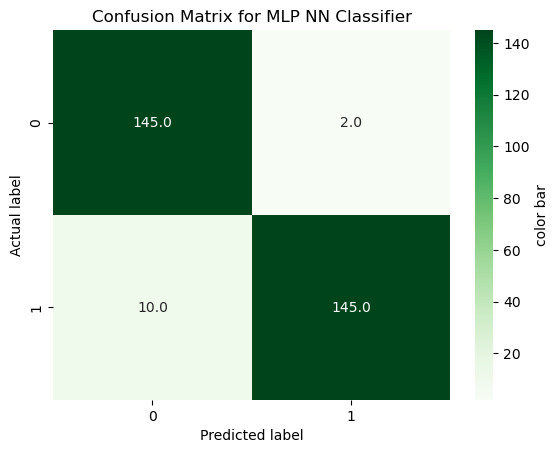

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Greens", annot=True, fmt=".1f", cbar_kws={"orientation":"vertical","label":"color bar"},)
plt.title('Confusion Matrix for MLP NN Classifier')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [135]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,pred_mlp)
print(f"sensitivity: {recall}")

sensitivity: 0.9354838709677419


In [136]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,pred_mlp)
print(f"precision: {precision}")

precision: 0.9863945578231292


In [137]:
specificity=cm [0,0]/(cm[0,0]+cm[0,1])
print(f"specificity: {specificity}")

specificity: 0.9863945578231292


In [138]:
print(classification_report(y_test,pred_mlp))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       147
           1       0.99      0.94      0.96       155

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.96      0.96      0.96       302



# PREDICTING USING THE BEST PERFORMING MODEL

# (SUPPORT VECTOR MACHINE MODEL) ACCURACY OF 96.35%)

In [139]:
#1 stands for fake article
#0 stands for real article

news_headline = "William Ruto appoints Ringathi Gachangua as his running mate in 2022 election"
data = vectorization.transform([news_headline]).toarray()
print(SVM.predict(data))

[0]


In [140]:
#print(data.shape)

In [141]:
#1 stands for fake article
#0 stands for real article

#news_headline = "Ukraine: Austrian leader, Putin meet…other new developments"

news_headline = "Governor Orengo Joins Kenya Kwanza"
data = vectorization.transform([news_headline]).toarray()
print(SVM.predict(data))

[1]


In [142]:
#creating a pickle file using serialization (saving the model into file)

import pickle
pickle_out = open ("SVM.pkl","wb")
pickle.dump(SVM, pickle_out)
pickle_out.close()